In [81]:
import pandas as pd 
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


Learning curves plot the training and validation loss of a sample of training examples by incrementally adding new training examples. Learning curves help us in identifying whether adding additional training examples would improve the validation score (score on unseen data). If a model is overfit, then adding additional training examples might improve the model performance on unseen data. Similarly, if a model is underfit, then adding training examples doesn’t help. 

In this example we will fit a Logistic Regression and evaluate for overfitting and underfitting

In [82]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [83]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species'] = le.fit_transform(df['species']) #transform target column

In [84]:
X = df.drop('species',axis=1)
y = df['species']

In [85]:
from sklearn.preprocessing import StandardScaler
col_list = list(X.columns)
sc = StandardScaler()
scaled = sc.fit_transform(X)

In [86]:
X_scaled = pd.DataFrame(scaled,columns=col_list)
X_scaled.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


c: Inverse Regularization variable to control overfitting (high value causes overfitting, low value causes underfitting)

We are not splitting the data into train and test because we will use StratifiedKFoldCV. 

KFold CV is a preferred method compared to hold out CV, since the model is tested on all the examples. Hold out CV is preferred when the model takes too long to train and we have a huge test set that truly represents the universe

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
c=1/10000
log_reg = LogisticRegression(max_iter=200,random_state=11,C=c) # LogisticRegression model
cv = StratifiedKFold(n_splits=5,random_state=11,shuffle=True) # Creating a StratifiedKFold object with 5 folds
cv_scores = cross_val_score(log_reg,X_scaled,y,scoring="accuracy",cv=cv) # Storing the CV scores (accuracy) of each fold
log_reg.fit(X_scaled,y) # Fitting the model


LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=11, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [88]:
train_score = log_reg.score(X_scaled,y) # Scoring the model on train set
train_score

0.8133333333333334

In [89]:
print('Cross Validation Accuracies')
cv_scores

Cross Validation Accuracies


array([0.86666667, 0.83333333, 0.8       , 0.8       , 0.8       ])

In [90]:
print('Mean Cross Validation Accuracy, Standard Deviation of Cross Validation Accuracy')
np.mean(cv_scores),np.std(cv_scores)



Mean Cross Validation Accuracy, Standard Deviation of Cross Validation Accuracy


(0.82, 0.02666666666666666)

In [91]:
#Building the learning curve
from sklearn.model_selection import learning_curve
train_size,train_scores,test_scores = learning_curve(estimator=log_reg,X=X_scaled,y=y,cv=cv,scoring="accuracy",random_state=11)
train_scores = 1-np.mean(train_scores,axis=1)#converting the accuracy score to misclassification rate
test_scores = 1-np.mean(test_scores,axis=1)#converting the accuracy score to misclassification rate
lc = pd.DataFrame({"Training_size":train_size,"Training_loss":train_scores,"Validation_loss":test_scores}).melt(id_vars="Training_size")
    

In [92]:
lc

,Training_size,variable,value
0,12,Training_loss,NaN
1,39,Training_loss,NaN
2,66,Training_loss,0.393939
3,93,Training_loss,0.139785
4,120,Training_loss,0.198333
5,12,Validation_loss,NaN
6,39,Validation_loss,NaN
7,66,Validation_loss,0.666667
8,93,Validation_loss,0.333333
9,120,Validation_loss,0.180000


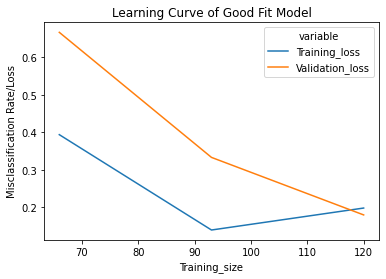

In [93]:
sns.lineplot(data=lc,x="Training_size",y="value",hue="variable")
plt.title("Learning Curve of Good Fit Model")
plt.ylabel("Misclassification Rate/Loss");

Interpreting the training loss

Learning curve of a good fit model has a moderately high training loss at the beginning which gradually decreases upon adding training examples and flattens gradually, indicating addition of more training examples doesn’t improve the model performance on training data.

Interpreting the validation loss

Learning curve of a good fit model has a high validation loss at the beginning which gradually decreases upon adding training examples and flattens gradually, indicating addition of more training examples doesn’t improve the model performance on unseen data.

We can also see that upon adding a reasonable number of training examples, both the training and validation loss moved close to each other.

get an overfit model by setting the inverse regularization variable/parameter ‘c’ to 10000 (high value of ‘c’ causes overfitting).

Learning curve of a overfit model is shown below

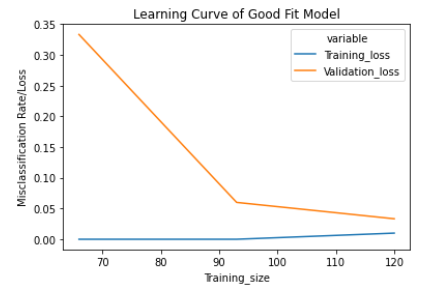

Typical features of the learning curve of an overfit model

Training loss and Validation loss are far away from each other.

Gradually decreasing validation loss (without flattening) upon adding training examples.

Very low training loss that’s very slightly increasing upon adding training examples.

**underfit model by setting the inverse regularization variable/parameter ‘c’ to 1/10000 (low value of ‘c’ causes underfitting).**

## Underfit model

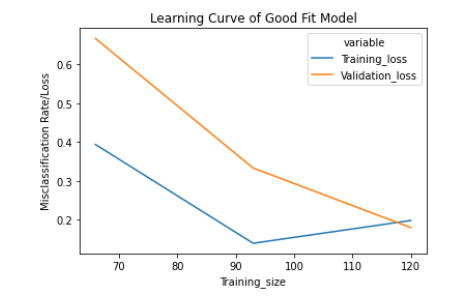

Typical features of the learning curve of an underfit model

Increasing training loss upon adding training examples.

Training loss and validation loss are close to each other at the end.

Sudden dip in the training loss and validation loss at the end (not always).